In [3]:
import clarinet.modem as modem
import scipy.io.wavfile

modulator = modem.FSK(2,4)
rate, data = scipy.io.wavfile.read("hi.wav")

receiver = modem.Receiver(modulator)
audio = receiver._reformatSignal(data, rate)
signal_parser = modem._SignalParser(audio, modulator)


FileNotFoundError: [Errno 2] No such file or directory: '../tests/data/hi.wav'

In [2]:
frames = signal_parser.getFrames()
print(frames)
print(signal_parser.getBytes())
print(receiver.retrieveByteStringFromWav("hi-2.wav"))

{50602: S,0,2,0,1,1,1,2,1,0,3,2,1,0,3,2,1,3,3,2,1,2,2,0,0,0,0,0,0,0,0,0,0}
b'Hello\n\x00\x00'
b'Hi everybody\n@\x00\x00'


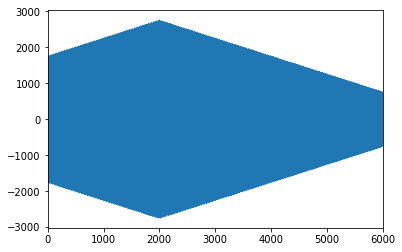

In [7]:
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt
rate, data = scipy.io.wavfile.read("HelloIdeal.wav")
audio = np.pad(data, (2000,0), 'constant')
correlation = correlate(audio, modulator.sync_symbol, mode='valid')
plt.plot(correlation)
plt.xlim([0,6000])
plt.show()